<a href="https://colab.research.google.com/github/Diwakar-Gupta/LrcDataScience/blob/main/22-02-03-Ensemble/Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Notes](https://1drv.ms/u/s!AmSu_rSXl5m3iSQr2MckZa36MYSJ?e=jV7Y61)

# Voting Classifier

In [122]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

In [123]:
X, Y = make_moons(n_samples = 500, shuffle = True, noise = 0.1)
X.shape, Y.shape

((500, 2), (500,))

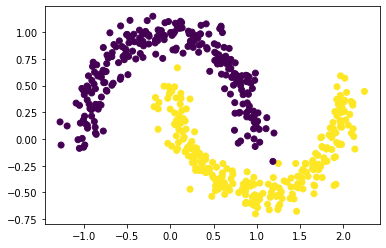

In [124]:
plt.scatter(X[:, 0], X[:, 1], c = Y)

In [125]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y)

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

log = LogisticRegression()
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
nb = GaussianNB()
svc = SVC(probability=True)

In [127]:
from sklearn.ensemble import VotingClassifier

estimators = [
              ('logistic', log),
              ('knn', knn),
              ('tree', tree),
              ('nb', nb),
              # ('svc', svc)
]

vclf = VotingClassifier(estimators = estimators, voting = 'soft')

bahuballi ->>  99%

mera nam surya  67%

mera nam surya  57%

In [128]:
from sklearn.metrics import accuracy_score

est = [log, knn, tree, nb, svc, vclf]

for model in est:
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    print(model.__class__.__name__ ,accuracy_score(y_pred, ytest))

LogisticRegression 0.888
KNeighborsClassifier 1.0
DecisionTreeClassifier 0.992
GaussianNB 0.896
SVC 1.0
VotingClassifier 0.992


# Bagging Classifier

In [129]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tclf = DecisionTreeClassifier()
bclf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100)

In [130]:
from sklearn.metrics import accuracy_score

est = [tclf, bclf]

for model in est:
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    print(model.__class__.__name__ ,accuracy_score(y_pred, ytest))

DecisionTreeClassifier 0.992
BaggingClassifier 0.992


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


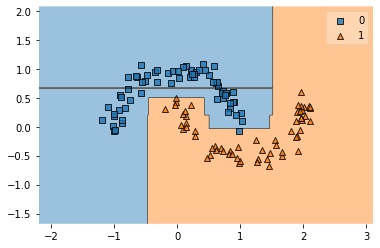

In [131]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(xtest, ytest, clf = tclf)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


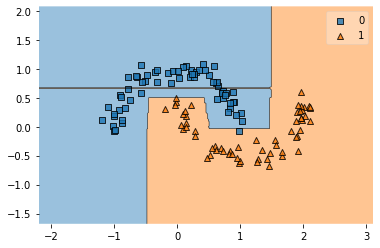

In [132]:
plot_decision_regions(xtest, ytest, clf = bclf)

# Pasting

In [133]:
bclf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100, bootstrap=False)
bclf.fit(xtrain, ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  n_estimators=100)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


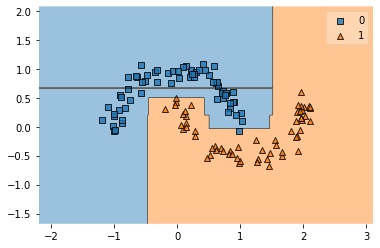

In [134]:
plot_decision_regions(xtest, ytest, clf = bclf)

In [135]:
bclf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100, oob_score=True)
bclf.fit(X, Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  oob_score=True)

In [136]:
bclf.oob_score_

0.982

# Warm Start

In [137]:
! pip install tqdm 

In [168]:
bclf = BaggingClassifier(DecisionTreeClassifier(), warm_start = True)

In [169]:
from tqdm.notebook import tqdm, trange

tests = []
trains = []

bclf.n_estimators = 0
for i in tqdm(range(10)):
    bclf.n_estimators = bclf.n_estimators + 1
    bclf.fit(xtrain, ytrain)
    
    testscore = bclf.score(xtest, ytest)
    trainscore = bclf.score(xtrain, ytrain)
    tests.append(testscore)
    trains.append(trainscore)

  0%|          | 0/10 [00:00<?, ?it/s]

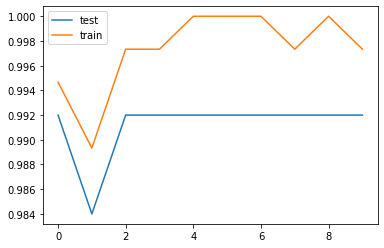

In [170]:
plt.plot(tests, label = 'test')
plt.plot(trains, label = 'train')

plt.legend()

**Best result is at index 2 estimators**

In [174]:
model = bclf.estimators_[2]
bclf.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:375: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  "Warm-start fitting without increasing n_estimators does not "


BaggingClassifier(base_estimator=DecisionTreeClassifier(), warm_start=True)

In [175]:
bclf.score(xtest, ytest), bclf.score(xtrain, ytrain)

(0.992, 0.9973333333333333)